# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [1]:
# manejo bbdd
import pandas as pd
import numpy as np
import datetime
#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew
#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [3]:
websites = pd.read_csv(r"C:\Users\Flor Guindo\Documents\CURSO DATA ANALYTICS\website.csv")

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [5]:
websites

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [6]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [7]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [8]:
# Which columns contain the features of the websites?

In [9]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
# Type

In [10]:
# 0 for bening 1 for maliciuos websites

In [11]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
# Charset, Server, Country, State.

In [12]:
def analyze_columns(websites):
    for column in websites.columns:
        print(f"Tabla de frecuencias para la columna '{column}':")
        print(websites[column].value_counts())
        num_unique = websites[column].nunique()
        print(f'\nNúmero de valores únicos en {column}: {num_unique}')
        print('-------------------------------------------------------------')

In [13]:
analyze_columns(websites)

Tabla de frecuencias para la columna 'URL':
URL
M0_109     1
B0_999     1
B0_2292    1
B0_2168    1
B0_2108    1
          ..
B0_104     1
M1_3       1
M0_53      1
M0_50      1
B0_676     1
Name: count, Length: 1781, dtype: int64

Número de valores únicos en URL: 1781
-------------------------------------------------------------
Tabla de frecuencias para la columna 'URL_LENGTH':
URL_LENGTH
39     86
40     48
46     44
42     43
38     43
       ..
134     1
131     1
107     1
128     1
249     1
Name: count, Length: 142, dtype: int64

Número de valores únicos en URL_LENGTH: 142
-------------------------------------------------------------
Tabla de frecuencias para la columna 'NUMBER_SPECIAL_CHARACTERS':
NUMBER_SPECIAL_CHARACTERS
9     274
8     211
11    208
10    198
7     159
6     148
12    134
13     92
14     58
15     50
17     42
20     41
16     35
19     27
18     26
21     14
22     10
23     10
24      7
25      7
26      7
27      6
29      4
34      3
5       2
28      

In [14]:
websites["CHARSET"].replace("utf-8", "UTF-8", inplace=True)
websites["CHARSET"].replace("iso-8859-1", "ISO-8859-1", inplace=True)

C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_22336\77040158.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  websites["CHARSET"].replace("utf-8", "UTF-8", inplace=True)
C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_22336\77040158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [15]:
analyze_columns(websites)

Tabla de frecuencias para la columna 'URL':
URL
M0_109     1
B0_999     1
B0_2292    1
B0_2168    1
B0_2108    1
          ..
B0_104     1
M1_3       1
M0_53      1
M0_50      1
B0_676     1
Name: count, Length: 1781, dtype: int64

Número de valores únicos en URL: 1781
-------------------------------------------------------------
Tabla de frecuencias para la columna 'URL_LENGTH':
URL_LENGTH
39     86
40     48
46     44
42     43
38     43
       ..
134     1
131     1
107     1
128     1
249     1
Name: count, Length: 142, dtype: int64

Número de valores únicos en URL_LENGTH: 142
-------------------------------------------------------------
Tabla de frecuencias para la columna 'NUMBER_SPECIAL_CHARACTERS':
NUMBER_SPECIAL_CHARACTERS
9     274
8     211
11    208
10    198
7     159
6     148
12    134
13     92
14     58
15     50
17     42
20     41
16     35
19     27
18     26
21     14
22     10
23     10
24      7
25      7
26      7
27      6
29      4
34      3
5       2
28      

#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

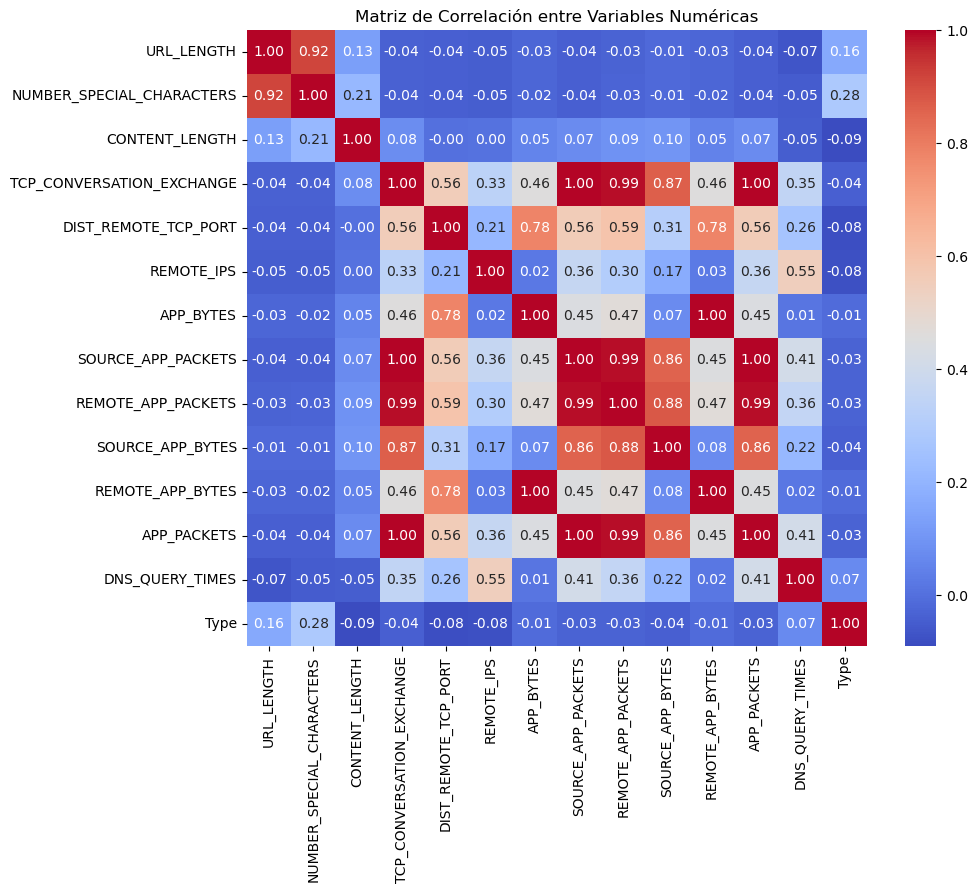

In [17]:
numericas = websites.select_dtypes(include=['float64', 'int64'])
matriz_corr = numericas.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [19]:
!pip install xgboost

In [20]:
import xgboost as xgb

In [21]:
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type

In [22]:
model = xgb.XGBClassifier()  # Usa XGBClassifier para clasificación

# Ajustar el modelo a los datos
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
sort_idx = model.feature_importances_.argsort()

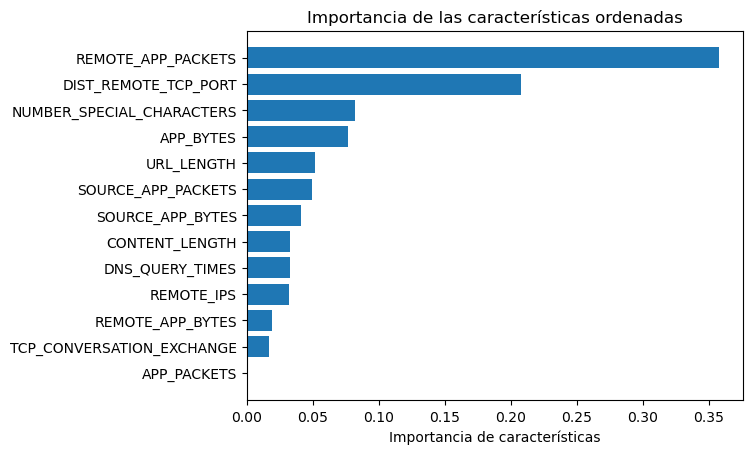

In [24]:
plt.barh(X.columns[sort_idx], model.feature_importances_[sort_idx])
plt.xlabel("Importancia de características")
plt.title("Importancia de las características ordenadas")
plt.show()

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

In [27]:
websites = websites.drop(columns=['APP_PACKETS','REMOTE_APP_BYTES'])

In [28]:
websites = websites.drop(columns=['URL_LENGTH', 'TCP_CONVERSATION_EXCHANGE'])

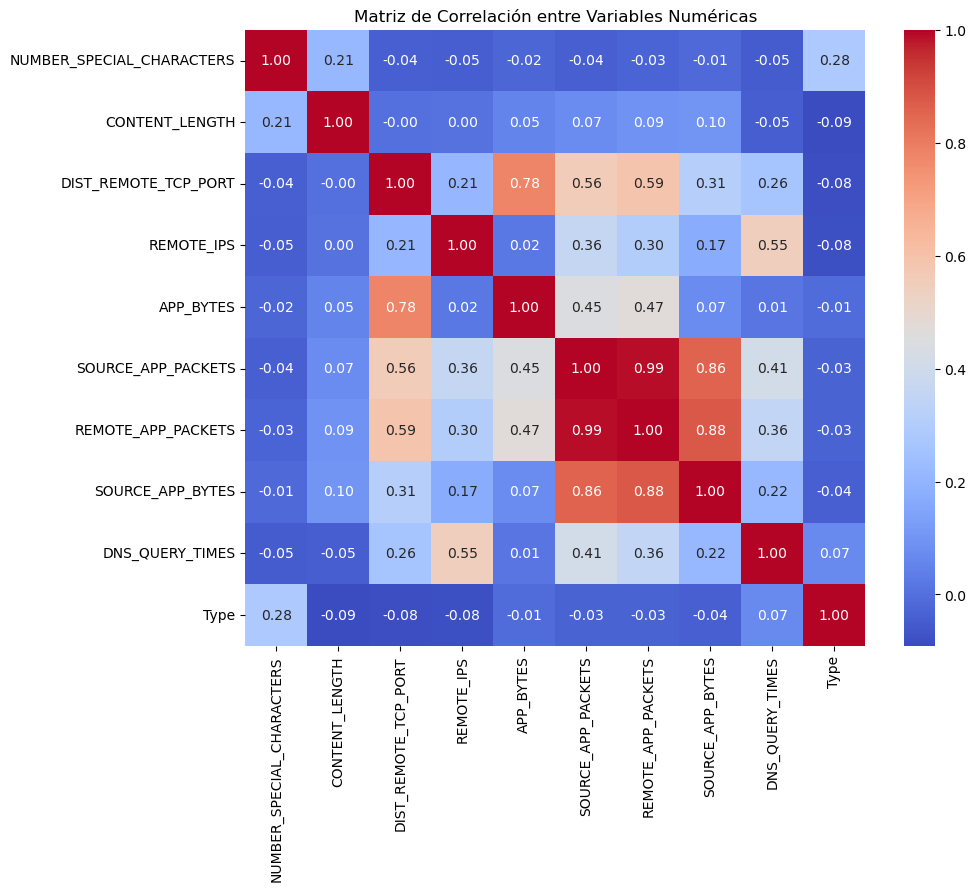

In [29]:
numericas = websites.select_dtypes(include=['float64', 'int64'])
matriz_corr = numericas.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [31]:
missing_counts = websites.isnull().sum()
missing_counts 

URL                            0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [32]:
# Determinar el umbral (50% del total de filas)
threshold = len(websites) * 0.5

# Filtrar columnas con más del 50% de valores faltantes
columns_to_drop = missing_counts[missing_counts > threshold].index
print(f"\nColumnas con más del 50% de datos faltantes: {columns_to_drop.tolist()}")

# Eliminar estas columnas del DataFrame
websites_cleaned = websites.drop(columns=columns_to_drop)

# Mostrar el resultado final
print("\nDimensiones del DataFrame después de eliminar columnas:")
print(websites_cleaned.shape)



Columnas con más del 50% de datos faltantes: []

Dimensiones del DataFrame después de eliminar columnas:
(1781, 17)


In [33]:
websites_cleaned_no_missing = websites_cleaned.dropna()
websites_cleaned_no_missing

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
3,B0_113,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,22,3,3812,39,37,18784,8.0,0
6,B0_462,6,ISO-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,0,3,1189,14,13,8559,2.0,0
7,B0_1128,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,0,0,0,0,0,0,0.0,0
11,B0_1102,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,CO,22/11/2016 0:00,23/11/2016 0:00,0,0,0,0,0,0,0.0,0
16,M0_97,7,ISO-8859-1,nginx,686.0,RU,Novosibirskaya obl.,25/05/2013 0:00,23/05/2016 0:00,0,2,603,8,9,1580,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,B0_2233,22,ISO-8859-1,AkamaiGHost,374.0,US,DC,15/06/2006 0:00,22/06/2016 0:00,5,2,564,6,7,442,0.0,0
1762,B0_221,24,UTF-8,nginx,11833.0,US,Arizona,13/07/1998 0:00,28/03/2017 0:00,20,8,4167,33,33,3181,4.0,0
1774,B0_156,29,ISO-8859-1,Microsoft-IIS/7.5; litigation_essentials.lexis...,4890.0,US,NY,26/06/1997 0:00,18/11/2014 0:00,2,7,2062,30,26,8161,8.0,0
1778,B0_162,34,UTF-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,2,6,6631,87,89,132181,4.0,0


#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [35]:
missing_counts_cleaned = websites_cleaned_no_missing.isnull().sum()
missing_counts_cleaned

URL                          0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [38]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                1103
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
CN                  10
IN                  10
FR                   9
CZ                   9
NL                   6
CH                   6
[u'GB'; u'UK']       5
KR                   5
PH                   4
BS                   4
ru                   4
AT                   4
HK                   3
us                   3
TR                   3
BE                   3
DE                   3
SC                   3
KY                   3
SE                   3
BR                   2
UY                   2
Cyprus               2
SI                   2
UA                   2
RU                   2
IL                   2
NO                   2
KG                   2
TH                   1
se                   1
LV                   1
LU                   1
United Kingdom       1
UG                  

In [41]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(
    lambda x: good_country[x] if pd.notna(x) else 'None'
)




In [52]:
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ',
       'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

In [55]:
# Your code here
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

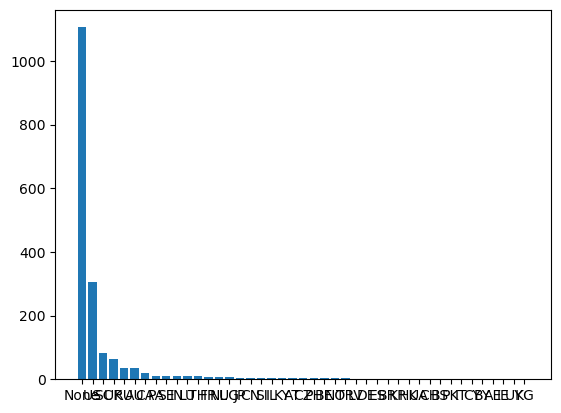

<Figure size 1500x1500 with 0 Axes>

In [57]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

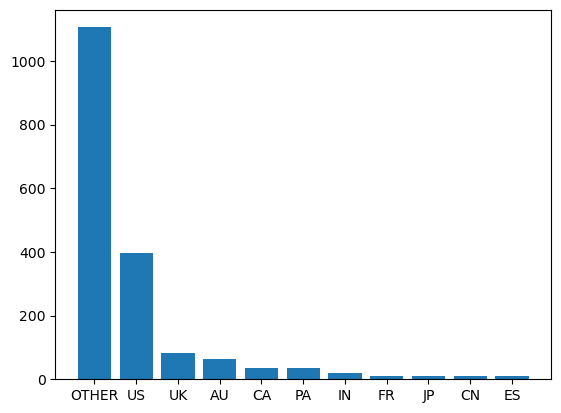

<Figure size 1500x1500 with 0 Axes>

In [59]:
# Obtener los 10 valores más frecuentes, excluyendo 'None'
top_countries = websites['WHOIS_COUNTRY'].value_counts().head(11).index.tolist()
top_countries = [country for country in top_countries if country != 'None']

# Reemplazar valores fuera de los principales 10 por 'OTHER'
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(
    lambda x: x if x in top_countries else 'OTHER'
)

print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [86]:
websites_nuevo = websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'])
websites_nuevo

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,7,ISO-8859-1,nginx,263.0,OTHER,0,2,700,9,10,1153,2.0,1
1,B0_2314,6,UTF-8,Apache/2.4.10,15087.0,OTHER,7,4,1230,17,19,1265,0.0,0
2,B0_911,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,OTHER,0,0,0,0,0,0,0.0,0
3,B0_113,6,ISO-8859-1,nginx,162.0,US,22,3,3812,39,37,18784,8.0,0
4,B0_403,6,UTF-8,NaN,124140.0,US,2,5,4278,61,62,129889,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,16,UTF-8,Apache,NaN,ES,0,0,0,0,3,186,0.0,1
1777,M4_41,17,UTF-8,Apache,NaN,ES,0,0,0,0,2,124,0.0,1
1778,B0_162,34,UTF-8,Apache/2.2.16 (Debian),8904.0,US,2,6,6631,87,89,132181,4.0,0
1779,B0_1152,34,ISO-8859-1,cloudflare-nginx,NaN,US,0,0,0,0,0,0,0.0,0


# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [63]:
websites_nuevo.dtypes

URL                           object
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [88]:
websites_nuevo = websites_nuevo.drop(columns=['URL'])
websites_nuevo

,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,7,ISO-8859-1,nginx,263.0,OTHER,0,2,700,9,10,1153,2.0,1
1,6,UTF-8,Apache/2.4.10,15087.0,OTHER,7,4,1230,17,19,1265,0.0,0
2,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,OTHER,0,0,0,0,0,0,0.0,0
3,6,ISO-8859-1,nginx,162.0,US,22,3,3812,39,37,18784,8.0,0
4,6,UTF-8,NaN,124140.0,US,2,5,4278,61,62,129889,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,16,UTF-8,Apache,NaN,ES,0,0,0,0,3,186,0.0,1
1777,17,UTF-8,Apache,NaN,ES,0,0,0,0,2,124,0.0,1
1778,34,UTF-8,Apache/2.2.16 (Debian),8904.0,US,2,6,6631,87,89,132181,4.0,0
1779,34,ISO-8859-1,cloudflare-nginx,NaN,US,0,0,0,0,0,0,0.0,0


#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [90]:
websites_nuevo['CHARSET'].value_counts()

CHARSET
UTF-8           1055
ISO-8859-1       561
us-ascii         155
windows-1251       1
ISO-8859           1
windows-1252       1
Name: count, dtype: int64

`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [93]:
websites_nuevo['SERVER'].value_counts()

SERVER
Apache                                                       386
nginx                                                        211
Microsoft-HTTPAPI/2.0                                        113
cloudflare-nginx                                              94
Microsoft-IIS/7.5                                             51
                                                            ... 
mw2103.codfw.wmnet                                             1
Apache/2.4.25 (Debian)                                         1
ECD (fll/0790)                                                 1
Apache/2.4.25 (FreeBSD) OpenSSL/1.0.1s-freebsd PHP/5.6.30      1
Apache/2.2.16 (Debian)                                         1
Name: count, Length: 238, dtype: int64

Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [111]:
def categorize_server(server):
    if isinstance(server, str):
        server_lower = server.lower()  # Convertir a minúsculas para facilitar la comparación
        if 'microsoft' in server_lower:
            return 'Microsoft'
        elif 'apache' in server_lower:
            return 'Apache'
        elif 'nginx' in server_lower:
            return 'nginx'
    return 'Other'

# Aplicar la función a la columna SERVER
websites_nuevo['SERVER'] = websites_nuevo['SERVER'].apply(categorize_server)

# Verificar los valores únicos después del procesamiento
print(websites_nuevo['SERVER'].value_counts())

SERVER
Apache       643
Other        504
nginx        436
Microsoft    198
Name: count, dtype: int64


In [113]:
websites_nuevo

,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,7,ISO-8859-1,nginx,263.0,OTHER,0,2,700,9,10,1153,2.0,1
1,6,UTF-8,Apache,15087.0,OTHER,7,4,1230,17,19,1265,0.0,0
2,6,us-ascii,Microsoft,324.0,OTHER,0,0,0,0,0,0,0.0,0
3,6,ISO-8859-1,nginx,162.0,US,22,3,3812,39,37,18784,8.0,0
4,6,UTF-8,Other,124140.0,US,2,5,4278,61,62,129889,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,16,UTF-8,Apache,NaN,ES,0,0,0,0,3,186,0.0,1
1777,17,UTF-8,Apache,NaN,ES,0,0,0,0,2,124,0.0,1
1778,34,UTF-8,Apache,8904.0,US,2,6,6631,87,89,132181,4.0,0
1779,34,ISO-8859-1,nginx,NaN,US,0,0,0,0,0,0,0.0,0


OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [116]:
website_dummy = pd.get_dummies(websites_nuevo, drop_first=True)
display(website_dummy.head())

,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_FR,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,7,263.0,0,2,700,9,10,1153,2.0,1,...,False,False,False,False,False,False,True,False,False,False
1,6,15087.0,7,4,1230,17,19,1265,0.0,0,...,False,False,False,False,False,False,True,False,False,False
2,6,324.0,0,0,0,0,0,0,0.0,0,...,False,False,False,False,False,False,True,False,False,False
3,6,162.0,22,3,3812,39,37,18784,8.0,0,...,False,False,False,False,False,False,False,False,False,True
4,6,124140.0,2,5,4278,61,62,129889,4.0,0,...,False,False,False,False,False,False,False,False,False,True


Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [119]:
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 1   CONTENT_LENGTH             969 non-null    float64
 2   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 3   REMOTE_IPS                 1781 non-null   int64  
 4   APP_BYTES                  1781 non-null   int64  
 5   SOURCE_APP_PACKETS         1781 non-null   int64  
 6   REMOTE_APP_PACKETS         1781 non-null   int64  
 7   SOURCE_APP_BYTES           1781 non-null   int64  
 8   DNS_QUERY_TIMES            1780 non-null   float64
 9   Type                       1781 non-null   int64  
 10  CHARSET_ISO-8859-1         1781 non-null   bool   
 11  CHARSET_UTF-8              1781 non-null   bool   
 12  CHARSET_us-ascii           1781 non-null   bool   
 13  CHARSET_windows-1251       1781 non-null   bool 

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [141]:
website_dummy

,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_FR,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,7,263.0,0,2,700,9,10,1153,2.0,1,...,False,False,False,False,False,False,True,False,False,False
1,6,15087.0,7,4,1230,17,19,1265,0.0,0,...,False,False,False,False,False,False,True,False,False,False
2,6,324.0,0,0,0,0,0,0,0.0,0,...,False,False,False,False,False,False,True,False,False,False
3,6,162.0,22,3,3812,39,37,18784,8.0,0,...,False,False,False,False,False,False,False,False,False,True
4,6,124140.0,2,5,4278,61,62,129889,4.0,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,16,NaN,0,0,0,0,3,186,0.0,1,...,False,False,True,False,False,False,False,False,False,False
1777,17,NaN,0,0,0,0,2,124,0.0,1,...,False,False,True,False,False,False,False,False,False,False
1778,34,8904.0,2,6,6631,87,89,132181,4.0,0,...,False,False,False,False,False,False,False,False,False,True
1779,34,NaN,0,0,0,0,0,0,0.0,0,...,False,False,False,False,False,False,False,False,False,True


In [125]:
from sklearn.model_selection import train_test_split

X = website_dummy.drop(columns = "Type")
y = website_dummy.Type

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [153]:
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression(random_state=42, max_iter=10000)

A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [139]:
model = modelo_logistico.fit(X_train,y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [143]:
from sklearn.impute import SimpleImputer

# Crear un imputador para reemplazar valores NaN con la media
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputador a los datos de entrenamiento y transformar X_train
X_train = imputer.fit_transform(X_train)

In [155]:
model = modelo_logistico.fit(X_train,y_train)

C:\Users\Flor Guindo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_logistico = LogisticRegression(max_iter=1000)
modelo_logistico.fit(X_train_scaled, y_train)

C:\Users\Flor Guindo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


LogisticRegression(max_iter=1000)

Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [161]:
X_test_scaled = imputer.fit_transform(X_test_scaled)

In [163]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predicciones en el conjunto de prueba
y_pred = modelo_logistico.predict(X_test_scaled)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Puntuación de precisión
accuracy = accuracy_score(y_test, y_pred)
print("\nPuntuación de precisión:")
print(accuracy)

Matriz de confusión:
[[304   2]
 [ 29  22]]

Puntuación de precisión:
0.9131652661064426


¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

In [ ]:
# La puntuacion de precision nos muestra un buen resultado ya que es un porcentaje de aciertos bastante elevado.

### Conclusiones:


#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [165]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo con max_depth=3
DTC = DecisionTreeClassifier(max_depth=3, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
DTC.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [167]:
# Calcular las probabilidades de predicción
probabilidades_predichas = DTC.predict_proba(X_test_scaled)[:, 1]

# Decidir 0 o 1 usando el umbral de 0.5
y_pred_umbral = (probabilidades_predichas > 0.5).astype(int)

# Imprimir la matriz de confusión
conf_matrix_umbral = confusion_matrix(y_test, y_pred_umbral)

# Imprimir la puntuación de precisión
accuracy_umbral = accuracy_score(y_test, y_pred_umbral)

print("Matriz de confusión:")
print(conf_matrix_umbral)
print("\nPuntuación de precisión:")
print(accuracy_umbral)

Matriz de confusión:
[[306   0]
 [ 36  15]]

Puntuación de precisión:
0.8991596638655462


#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [169]:
DTC5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
DTC5.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [171]:
# Calcular las probabilidades de predicción
probabilidades_predichas = DTC5.predict_proba(X_test_scaled)[:, 1]

# Decidir 0 o 1 usando el umbral de 0.5
y_pred_umbral = (probabilidades_predichas > 0.5).astype(int)

# Imprimir la matriz de confusión
conf_matrix_umbral = confusion_matrix(y_test, y_pred_umbral)

# Imprimir la puntuación de precisión
accuracy_umbral = accuracy_score(y_test, y_pred_umbral)

print("Matriz de confusión:")
print(conf_matrix_umbral)
print("\nPuntuación de precisión:")
print(accuracy_umbral)

Matriz de confusión:
[[304   2]
 [ 27  24]]

Puntuación de precisión:
0.9187675070028011


¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

### Conclusión:

In [ ]:
# Ha habido una pequeña mejora en la puntuacion del modelo. Se ha reducido la cantidad de falsos negativos pero aumentado la de falsos positivos. Lo que podria indicar un sobreentrenameinto del modelo con los datos de entrenamiento.


<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

## Conclusiones:

Add your comments here: